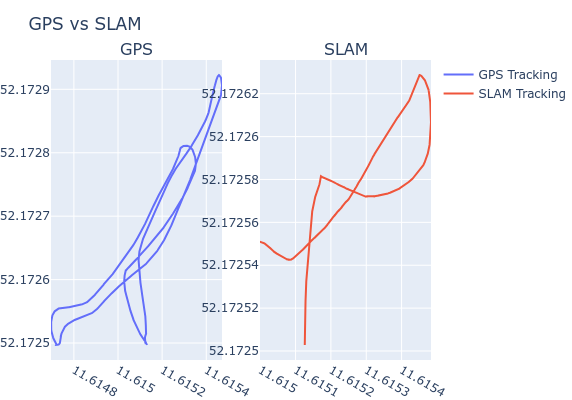

SLAM Points : 88
GPS  Points : 79


In [20]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py
import numpy as np
import pandas as pd

# Read data from file
gps_data = "/mnt/hdd02/ba_copter_videos/Flight_05/DJIFlightRecord_2024-04-12_[18-34-58].csv"
# File name of trajectory data
slam_data = '/home/bastian/uni/visual_odometry_playground/orb_slam3/orb_slam3_ws/CameraTrajectory.csv'

######################## GPS PLOT ########################

data = pd.read_csv(gps_data)
# print(data.columns)

# Extracting data
latitude = data["OSD.latitude"]
longitude = data["OSD.longitude"]

# Create subplot
fig = make_subplots(rows=1, cols=2, subplot_titles=['GPS', 'SLAM'])

# Add trace for trajectory
fig.add_trace(go.Scatter(
    x=longitude,
    y=latitude,
    mode='lines', name='GPS Tracking'
), row=1, col=1)

######################## SLAM PLOT ########################

# Lists for delta values
cam_delta_twb_x = []
cam_delta_twb_y = []

# Read trajectory data and store delta values in lists
with open(slam_data, 'r') as f:
    for line in f:
        parts = line.split()
        cam_delta_twb_x.append(float(parts[1]))
        cam_delta_twb_y.append(-float(parts[2]))

slam_layout = dict(title='SLAM',
                   xaxis=dict(title='X'),
                   yaxis=dict(title='Y'),
                   margin=dict(l=0, r=0, t=30, b=0))

lon = [longitude[0]]
lat = [latitude[0]]
scale = 0.00001

# Move scale nearly to koordinate system
for i in range(len(cam_delta_twb_x)):
    if i == 0:
        continue
    delta_lon = cam_delta_twb_x[i] - cam_delta_twb_x[i-1]
    delta_lat = cam_delta_twb_y[i] - cam_delta_twb_y[i-1]
    lon.append(lon[i-1] + (scale * delta_lon))
    lat.append(lat[i-1] + (scale * delta_lat))

# Add plot
fig.add_trace(go.Scatter(
    x=lon,
    y=lat,
    mode='lines', name='SLAM Tracking'
), row=1, col=2)

fig.update_layout(title='GPS vs SLAM',
                  width=750,
                  height=400,
                  margin=dict(l=0, r=0, t=60, b=0))

py.iplot(fig)

print("SLAM Points : " + str(len(slam_data)))
print("GPS  Points : " + str(len(gps_data)))